# The Ocean's Longest Diving Animals

How long can air-breathing animals hold their breath while diving? Which animals can stay submerged for the longest time?

The file `longest-diving-animals.csv` contains the recorded durations, in minutes, of the longest dives ever recorded in the scientific literature for different species of marine mammals. 

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'longest-diving-animals.csv'.

# from google.colab import files
# uploaded = files.upload()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('longest-diving-animals.csv')
df.head()

,animal,category,duration
0,Emperor Penguin,penguins,32.2
1,King Penguin,penguins,9.2
2,Rockhopper Penguin,penguins,3.2
3,Macaroni Penguin,penguins,6.3
4,Royal Penguin,penguins,7.5


### Project Ideas

- Create horizontal bar plots to show the longest diving animals, either for each category or within a category.

- Follow the Pro Tips.

- Convert dive durations from minutes to hours for easier understanding - 2.5 hours is clearer than 150 minutes.

- Add a reference bar to help readers build intuition about the durations. 

Side Note: The longest time a person has held their breath underwater is 24 minutes 37 seconds. This was done at the surface of a pool, not while freediving, so it might not directly comparable.


In [30]:
# YOUR CODE HERE (add additional cells as needed)
df['duration'] = round(df['duration'] / 60, 2)
df = df.rename(columns={'duration': 'duration_hours'})
df

,animal,category,duration_hours
0,Emperor Penguin,penguins,0.54
1,King Penguin,penguins,0.15
2,Rockhopper Penguin,penguins,0.05
3,Macaroni Penguin,penguins,0.10
4,Royal Penguin,penguins,0.12
...,...,...,...
103,North Atlantic Right Whale,baleen whales,0.27
104,Humpback Whale,baleen whales,0.40
105,Atlantic Walrus,walruses,0.82
106,Dungong,other marine mammals,0.17


In [33]:
df.sort_values(by='duration_hours', ascending=False, inplace=True)
df.tail(20)


,animal,category,duration_hours
45,Common Eider,other seabirds,0.02
30,Cape Cormorant,other seabirds,0.02
27,Common Diving Petrel,other seabirds,0.01
40,White-Chinned Petrel,other seabirds,0.01
23,Cape Gannet,other seabirds,0.01
24,Australasian Gannet,other seabirds,0.01
25,Abbotts Booby,other seabirds,0.01
26,South-Georgian Diving Petrel,other seabirds,0.01
31,Japanese Cormorant,other seabirds,0.01
22,Northern Gannet,other seabirds,0.01


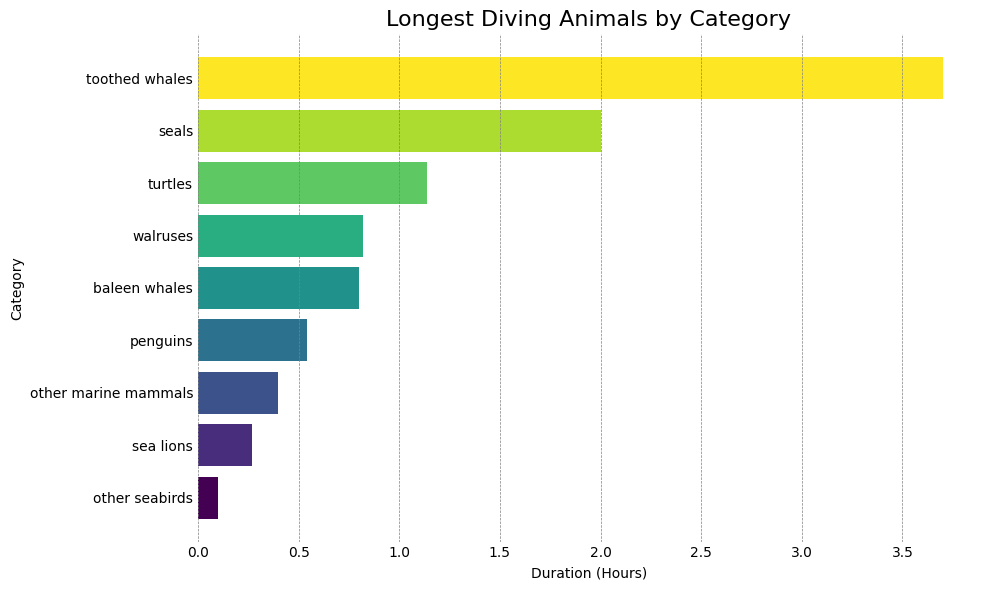

In [94]:
longest_divers = df.loc[df.groupby('category')['duration_hours'].idxmax()].reset_index(drop=True)

# Plotting and defining the functions
def clean_bar_axes():
    ax = plt.gca()
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', length=0)

def barh_plot(df, title, x_label, y_label, x, y, ref=None):
    


    # sort the dataframe by the order column
    df.sort_values(by=y, ascending=True, inplace=True)

    if ref:
        colors = ['red' if val == ref else 'orange' for val in df.index]
    else:
        # list of colors for the bars
        cmap = plt.get_cmap('viridis', lut=len(df))
        colors = [cmap(i) for i in range(len(df))]

    # create the horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(df[x], df[y], color=colors)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)

    clean_bar_axes()

    plt.tight_layout()
    plt.show()

barh_plot(longest_divers, 'Longest Diving Animals by Category', 'Duration (Hours)', 'Category', 'category', 'duration_hours')


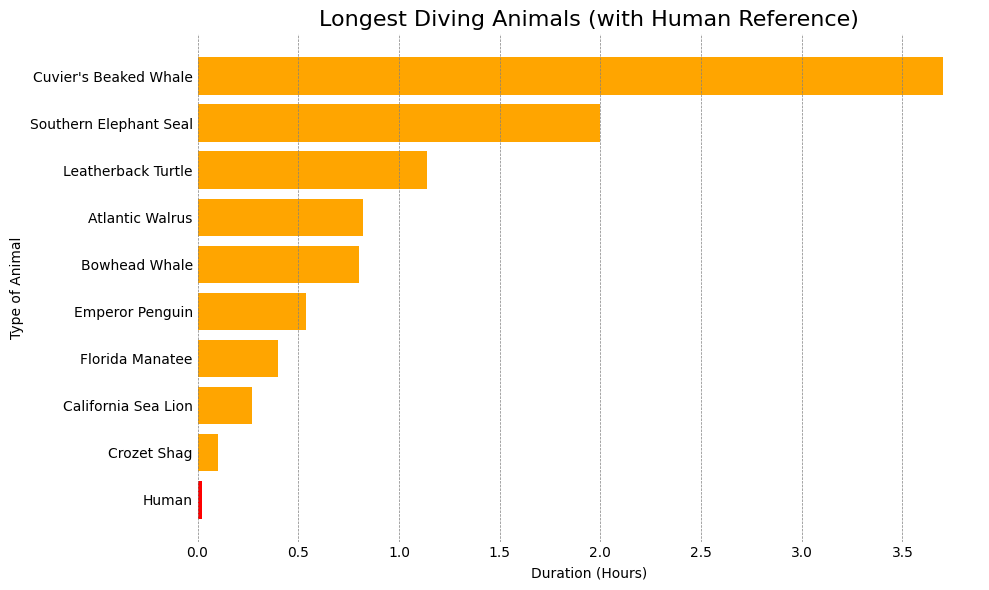

In [92]:
# Adding a human reference
longest_divers.loc['human_ref'] = ['Human', 'Mammal', 0.02]
barh_plot(longest_divers, 'Longest Diving Animals (with Human Reference)', 'Duration (Hours)', 'Type of Animal', 'animal', 'duration_hours', 'human_ref')